In [188]:
import matplotlib.pyplot as plt
import numpy as np
import time
import random
import math
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns

In [189]:
def rastrigin(x):
    A = 10
    return A * len(x) + sum([(xi ** 2 - A * np.cos(2 * np.pi * xi)) for xi in x])


In [190]:
def aptidao(x):
    return rastrigin(x) + 1


In [191]:
def cria_populacao(N, p):
    return np.random.randint(0, 2, size=(N, p))


In [192]:
# def decodifica(populacao, inf, sup):
#     individuos = []
#     for individuo in populacao:
#         s = sum([individuo[i] * 2**i for i in range(len(individuo))])
#         x = inf + (sup - inf) / (2**len(individuo) - 1) * s
#         individuos.append(x)
#     return np.array(individuos)


In [193]:
def roleta(pop, aptidao):
    total_aptidao = np.sum(aptidao)
    probs = aptidao / total_aptidao
    return pop[np.random.choice(len(pop), p=probs)]


In [194]:
def recombina(pai1, pai2):
    idx = np.random.randint(1, len(pai1))
    filho1 = np.concatenate((pai1[:idx], pai2[idx:]))
    filho2 = np.concatenate((pai2[:idx], pai1[idx:]))
    return filho1, filho2


In [195]:
def mutacao(individuo):
    idx = np.random.randint(0, len(individuo))
    individuo[idx] = 1 - individuo[idx]
    return individuo


In [196]:
def cria_populacao_continua(N, p):
    return np.random.uniform(-10, 10, (N, p))


In [197]:
def torneio(pop, aptidao, k=3):
    indices = np.random.choice(len(pop), k)
    melhor = indices[0]
    for i in indices:
        if aptidao[i] < aptidao[melhor]:
            melhor = i
    return pop[melhor]


In [198]:
def sbx(pai1, pai2, beta=1):
    beta = np.random.uniform(0, 1, size=pai1.shape)
    filho1 = 0.5 * ((1 + beta) * pai1 + (1 - beta) * pai2)
    filho2 = 0.5 * ((1 - beta) * pai1 + (1 + beta) * pai2)
    return filho1, filho2


In [199]:
def mutacao_gaussiana(individuo, sigma=0.1):
    mutante = individuo + np.random.normal(0, sigma, size=individuo.shape)
    return np.clip(mutante, -10, 10)


In [200]:
def convergiu(aptidoes):
    return np.std(aptidoes) < 1e-3

In [201]:

from tqdm import tqdm
# Configurações
N = 100  # Tamanho da população
p = 20   # Dimensões da função de Rastrigin
geracoes = 100  # Número de gerações
n_rodadas = 100 # Número de rodadas

# Guardar os resultados de aptidão
melhores_aptidoes = []
medias_aptidoes = []
piores_aptidoes = []
desvio_padrao_aptidoes = []
# Loop de rodadas
for _ in tqdm(range(n_rodadas), desc="Rodadas"):
    # Inicializa população
    populacao = cria_populacao(N, p)

    # Evolução ao longo das gerações
    for geracao in range(geracoes):
       aptidoes = np.array([aptidao(ind) for ind in populacao])        
       # Seleção e criação da nova geração
    nova_populacao = []

    for i in range(N // 2):  # Gera N filhos no total
        pai1 = roleta(populacao, aptidoes)
        pai2 = roleta(populacao, aptidoes)
        filho1, filho2 = recombina(pai1, pai2)
        nova_populacao.append(mutacao(filho1))
        nova_populacao.append(mutacao(filho2))

    populacao = np.array(nova_populacao)
        
        # Verifica critério de convergência
    if convergiu(aptidoes):
            break
    
    # Coleta os resultados
    aptidoes_finais = np.array([aptidao(ind) for ind in populacao])
    melhores_aptidoes.append(np.min(aptidoes_finais))
    medias_aptidoes.append(np.mean(aptidoes_finais))
    piores_aptidoes.append(np.max(aptidoes_finais))
    desvio_padrao_aptidoes.append(np.std(aptidoes_finais))

# Tabela de resultados
print("Tabela de Resultados (100 rodadas):")
print(f"{'Rodada':<10}{'Melhor':<10}{'Pior':<10}{'Média':<10}{'Desvio Padrão':<15}")
for i in range(n_rodadas):
    print(f"{i+1:<10}{melhores_aptidoes[i]:<10.4f}{piores_aptidoes[i]:<10.4f}{medias_aptidoes[i]:<10.4f}{desvio_padrao_aptidoes[i]:<15.4f}")



Rodadas: 100%|██████████| 100/100 [00:59<00:00,  1.69it/s]

Tabela de Resultados (100 rodadas):
Rodada    Melhor    Pior      Média     Desvio Padrão  
1         6.0000    17.0000   11.3100   2.3225         
2         6.0000    16.0000   11.0400   1.8969         
3         6.0000    18.0000   11.3500   2.5035         
4         8.0000    18.0000   11.7500   2.0267         
5         8.0000    18.0000   11.7200   2.2542         
6         5.0000    16.0000   10.9300   2.3378         
7         6.0000    17.0000   11.4800   2.0272         
8         6.0000    17.0000   11.9800   2.5139         
9         7.0000    17.0000   11.8400   2.2703         
10        6.0000    17.0000   10.8700   2.1984         
11        7.0000    15.0000   11.5300   1.9414         
12        6.0000    18.0000   11.3600   2.4719         
13        6.0000    18.0000   11.7200   2.1311         
14        6.0000    17.0000   11.2400   2.3372         
15        7.0000    16.0000   11.5600   2.1878         
16        5.0000    17.0000   11.2300   2.1719         
17        5.

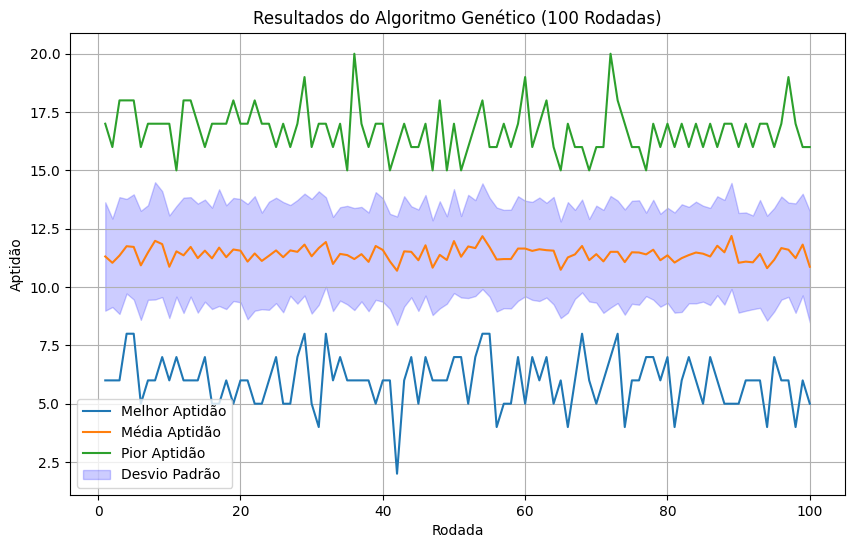

In [202]:
# Gráfico dos resultados
plt.figure(figsize=(10,6))
plt.plot(range(1, n_rodadas + 1), melhores_aptidoes, label="Melhor Aptidão")
plt.plot(range(1, n_rodadas + 1), medias_aptidoes, label="Média Aptidão")
plt.plot(range(1, n_rodadas + 1), piores_aptidoes, label="Pior Aptidão")
plt.fill_between(range(1, n_rodadas + 1), 
                 np.array(medias_aptidoes) - np.array(desvio_padrao_aptidoes),
                 np.array(medias_aptidoes) + np.array(desvio_padrao_aptidoes),
                 color='b', alpha=0.2, label="Desvio Padrão")
plt.xlabel("Rodada")
plt.ylabel("Aptidão")
plt.title("Resultados do Algoritmo Genético (100 Rodadas)")
plt.legend()
plt.grid(True)
plt.show()

Ponto Flutuante

In [203]:
# Inicializa a população com valores em ponto flutuante
def cria_populacao(N, p, inf=-10, sup=10):
    return np.random.uniform(inf, sup, size=(N, p))

In [204]:
# Seleção por torneio
def torneio(populacao, aptidoes, tamanho_torneio=3):
    indices = np.random.choice(len(populacao), tamanho_torneio, replace=False)
    vencedores = indices[np.argmin(aptidoes[indices])]
    return populacao[vencedores]


In [205]:
# Recombinacao SBX
def recombina_sbx(pai1, pai2, taxa_recomb=0.85, eta=20):
    if np.random.rand() < taxa_recomb:
        u = np.random.rand(*pai1.shape)
        beta = np.where(u <= 0.5, (2 * u)**(1 / (eta + 1)), (1 / (2 * (1 - u)))**(1 / (eta + 1)))
        filho1 = 0.5 * ((1 + beta) * pai1 + (1 - beta) * pai2)
        filho2 = 0.5 * ((1 - beta) * pai1 + (1 + beta) * pai2)
    else:
        filho1, filho2 = pai1.copy(), pai2.copy()
    return filho1, filho2

In [206]:
# Mutação Gaussiana
def mutacao_gaussiana(individuo, taxa_mutacao=0.01, sigma=0.1):
    for i in range(len(individuo)):
        if np.random.rand() < taxa_mutacao:
            individuo[i] += np.random.normal(0, sigma)
    return individuo

In [207]:
# Verifica critério de convergência
def convergiu(aptidoes, epsilon=1e-6):
    return np.std(aptidoes) < epsilon


In [208]:
# Parâmetros
N = 100  # Tamanho da população
p = 20   # Dimensões do problema
geracoes = 100  # Número de gerações
n_rodadas = 100 # Número de rodadas

# Guardar os resultados de aptidão
melhores_aptidoes = []
medias_aptidoes = []
piores_aptidoes = []
desvio_padrao_aptidoes = []

# Loop de rodadas
for _ in tqdm(range(n_rodadas), desc="Rodadas"):
    # Inicializa população
    populacao = cria_populacao(N, p)
    
    # Evolução ao longo das gerações
    for geracao in range(geracoes):
        aptidoes = np.array([aptidao(ind) for ind in populacao])
        
        # Seleção e criação da nova geração
        nova_populacao = []
        for _ in range(N // 2):  # Gera N filhos no total
            pai1 = torneio(populacao, aptidoes)
            pai2 = torneio(populacao, aptidoes)
            filho1, filho2 = recombina_sbx(pai1, pai2)
            nova_populacao.append(mutacao_gaussiana(filho1))
            nova_populacao.append(mutacao_gaussiana(filho2))
        
        populacao = np.array(nova_populacao)
        
        # Verifica critério de convergência
        if convergiu(aptidoes):
            break
    
    # Coleta os resultados
    aptidoes_finais = np.array([aptidao(ind) for ind in populacao])
    melhores_aptidoes.append(np.min(aptidoes_finais))
    medias_aptidoes.append(np.mean(aptidoes_finais))
    piores_aptidoes.append(np.max(aptidoes_finais))
    desvio_padrao_aptidoes.append(np.std(aptidoes_finais))

# Tabela de resultados
print("Tabela de Resultados (100 rodadas):")
print(f"{'Rodada':<10}{'Melhor':<10}{'Pior':<10}{'Média':<10}{'Desvio Padrão':<15}")
for i in range(n_rodadas):
    print(f"{i+1:<10}{melhores_aptidoes[i]:<10.4f}{piores_aptidoes[i]:<10.4f}{medias_aptidoes[i]:<10.4f}{desvio_padrao_aptidoes[i]:<15.4f}")

Rodadas: 100%|██████████| 100/100 [01:15<00:00,  1.33it/s]

Tabela de Resultados (100 rodadas):
Rodada    Melhor    Pior      Média     Desvio Padrão  
1         319.7071  326.8096  320.9608  0.8455         
2         403.1297  413.5862  404.4704  1.6603         
3         357.9120  368.0080  358.5838  1.3367         
4         303.8329  314.9177  305.0600  1.7774         
5         239.9035  250.6670  240.6685  1.3046         
6         322.2190  328.9766  322.8043  0.9833         
7         281.8492  289.0994  283.5668  0.8857         
8         363.3885  375.9045  365.1178  1.4655         
9         332.6175  341.7534  333.7518  1.3161         
10        342.8027  356.0244  344.1612  1.9560         
11        389.2321  398.5090  389.8802  1.5061         
12        409.3141  417.7626  410.2263  1.1897         
13        298.7174  307.0881  299.4472  1.0888         
14        329.0123  336.2847  329.4294  0.9141         
15        362.6538  374.6736  363.7459  1.3982         
16        353.5298  360.0896  354.4329  0.9287         
17        34

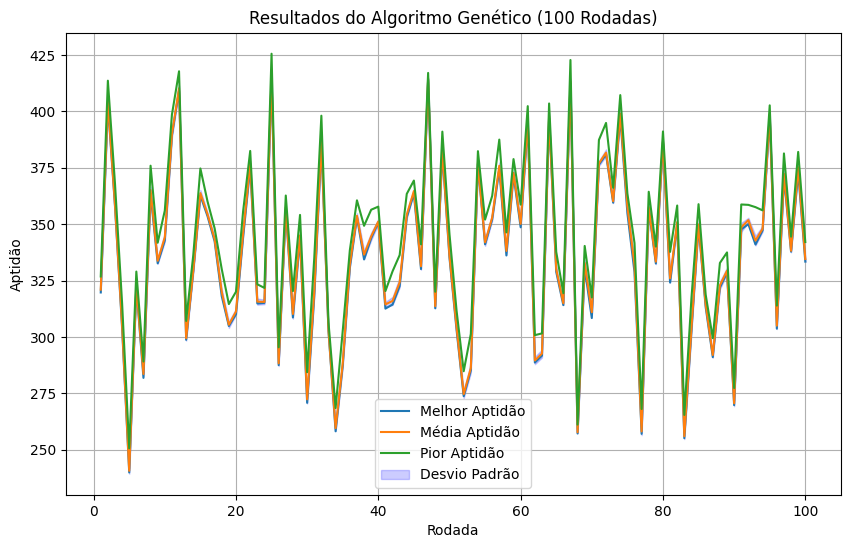

In [209]:
# Gráfico dos resultados
plt.figure(figsize=(10,6))
plt.plot(range(1, n_rodadas + 1), melhores_aptidoes, label="Melhor Aptidão")
plt.plot(range(1, n_rodadas + 1), medias_aptidoes, label="Média Aptidão")
plt.plot(range(1, n_rodadas + 1), piores_aptidoes, label="Pior Aptidão")
plt.fill_between(range(1, n_rodadas + 1), 
                 np.array(medias_aptidoes) - np.array(desvio_padrao_aptidoes),
                 np.array(medias_aptidoes) + np.array(desvio_padrao_aptidoes),
                 color='b', alpha=0.2, label="Desvio Padrão")
plt.xlabel("Rodada")
plt.ylabel("Aptidão")
plt.title("Resultados do Algoritmo Genético (100 Rodadas)")
plt.legend()
plt.grid(True)
plt.show()